주어진 데이터가 어디에서 나온 데이터인지조차 알지 못했던 제가 토론에 있는 Saturday.K님의 ['마키아벨리즘 테스트 Score 계산법 공유'](https://dacon.io/competitions/official/235647/talkboard/401557?page=1&dtype=recent&ptype=pub) 게시물을 보고 영감을 얻어 작성한 코드입니다. 이 자리를 통해 감사의 말씀을 전합니다. 

위 게시물에서 일부 질문이 Secret 처리되었어서 전반적인 마키아벨리아니즘 테스트 스코어를 계산하는 것은 힘들겠다고 하셨는데 그 문제를 간단한 방법으로 해결해보았습니다. 
## <u>Importing Package and Data</u>

In [1]:
import pandas as pd
import seaborn as sns

from IPython.display import Image

In [2]:
data = pd.read_csv("C:/Users/YEO JIMIN/Desktop/dacon/data/train.csv", index_col = 0)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1


## <u>테스트 문항 정리</u>
위에 언급한 게시물과 ['데이터 변수 설명'](https://dacon.io/competitions/official/235647/talkboard/401534?page=1&dtype=recent&ptype=pub) 게시물을 같이 살펴보고 정리해보면 다음과 같습니다. 부호 column 같은 경우 +이면 답변값이 높을수록 마키아벨리니즘 성향이 높은 것이고 -이면 답변값이 낮을수록 마키아벨리니즘 성향이 높은 것입니다.

In [3]:
Image("img/Picture1.png")

FileNotFoundError: No such file or directory: 'img/Picture1.png'

FileNotFoundError: No such file or directory: 'img/Picture1.png'

<IPython.core.display.Image object>

토론 게시물에는 있으나 데이터 변수 설명상에 Secret 처리된 8가지 문항은 다음과 같습니다.

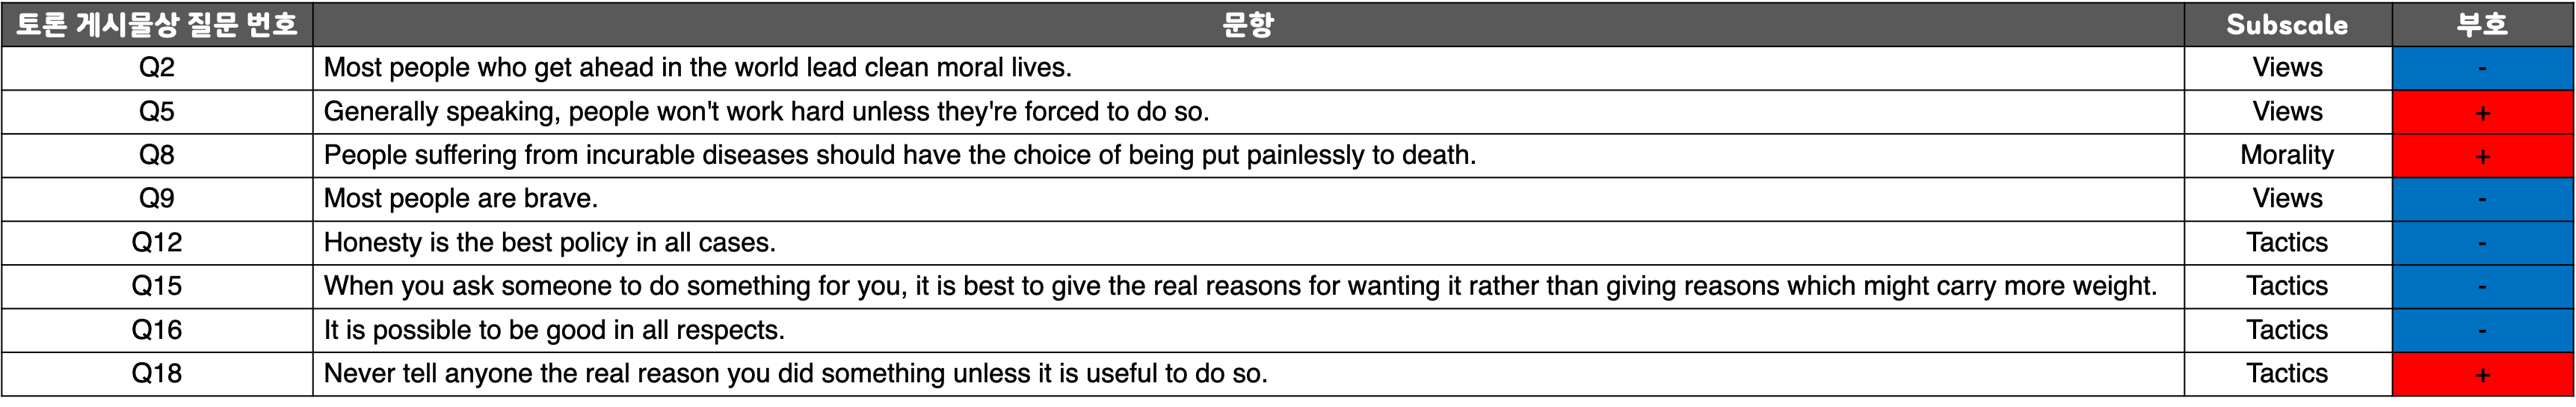

In [4]:
Image("img/Picture2.png")

### 답변값을 reverse해야하는 이유 
토론 게시물 마지막에 볼 수 있듯이 마키아벨리아니즘 테스트 스코어는 -부호를 가진 문항들의 답변값을 reverse 시키고 모든 문항의 답변들의 평균을 구한 것입니다. 만약 -부호를 가진 문항들의 답변값을 reverse하지 않고 평균값을 구할 경우 그 평균값이 true 마키아벨리니아니즘 테스트 스코어와 다른 경우가 발생할 수 있습니다. 그래서 어떤 문항들이 -부호를 가지는지 파악하는 것이 중요합니다. 하지만 문제는 Secret 처리된 8가지 문항에 +부호 3개와 -부호 5개가 섞여있다는 것입니다.

## <u>아이디어</u>
테스트의 모든 질문이 마키아벨리니즘 성향을 측정한다는 것에서 아이디어를 얻었습니다. 만약 마키아벨리니즘 성향이 높은 사람이 있다면 +부호인 문항들에서는 높은 답변값을 내놓았을 것이고 -부호인 문항들에서는 낮은 답변값을 내놓았을 것입니다. 그러므로 +인 문항과 -인 문항의 모든 답변자들의 답변값을 비교하면 correlation값이 음수일 것이고 그 반대로 같은 부호를 가지고 있는 문항들끼리 비교하면 correlation값이 양수로 나올 것입니다. 그렇다면 이를 통해 Secret 처리된 8가지 문항도 각 질문이 어떤 문제인지는 알기 어렵지만 적어도 부호가 +인지 -인지는 확인할 수 있을 것입니다.

보통 correlation이라고 할 때 Pearson correlation을 많이 이야기하지만 Pearson correlation을 사용하는 전제 조건인 linear relationship을 예상하지 않아서 그 대신 monotonic relationship을 전제로 하는 Spearman correlation을 사용했습니다. 
(Pearson과 Spearman correlation에 대한 비교는 [이곳](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)에서 확인하실 수 있습니다.)

### (1) reverse 처리 안했을 경우
주어진 데이터 그대로 문항간 Spearman correlation을 계산해보았습니다. 

In [4]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

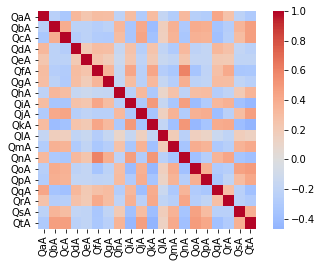

In [5]:
correlations = data[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

위 히트맵에서 볼 수 있듯이 부호가 같은 문항끼리는 (예를 들어 QbA와 QcA) correlation값이 양수이고, 부호가 다른 문항끼리는 (예를 들어 QbA와 QeA) correlation값이 음수입니다. 이것은 저의 가설과 맞아떨어지는 결과로서 좀 더 확신을 가지고 다음 스텝을 진행할 수 있었습니다.  

### (2) 이미 알고 있는 -부호 문항을 reverse 처리하기
"QeA", "QfA", "QkA", "QqA", "QrA" 이렇게 다섯 문항은 부호가 -인 것을 이미 알고 있기 때문에 reverse 처리했습니다. 

In [6]:
for col in data[Answers]:
    print(sorted(data[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [7]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    data[flip] = 6 - data[flip]

모든 문항의 답변이 1, 2, 3, 4, 5로 되어있기 때문에 답변값을 reverse시키기 위해서는 단순히 6에서 답변값을 빼주면 됩니다. 

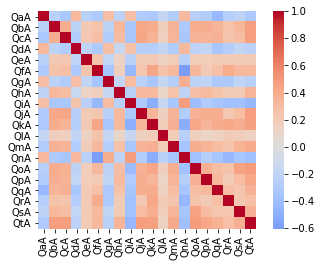

In [8]:
correlations = data[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

전보다 빨간색 타일수가 늘어났습니다. Secret이 아닌 문항들간의 관계를 살펴보았을 때 모두 다 양수 correlation을 나타내는 붉은색을 띠는 것을 볼 수 있습니다. 

그리고 5개의 파란줄이 눈에 띕니다. 이는 -부호를 가진 Secret 문항수와 일치합니다. 이를 통해 "QaA", "QdA", "QgA", "QiA", "QnA" 이렇게 다섯 문항이 -부호를 가진 문항이라는 걸 알 수 있습니다.

### (3) -부호인 Secret 문항을 reverse 처리하기 

In [9]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    data[flip] = 6 - data[flip]

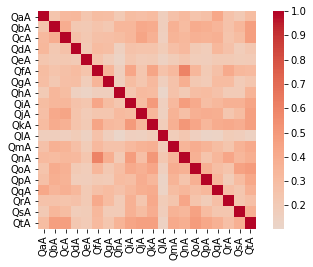

In [10]:
correlations = data[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

위와 마찬가지로 -부호인 Secret 문항("QaA", "QdA", "QgA", "QiA", "QnA")을 reverse 처리하면 마침내 모든 타일이 붉은색을 띠는 것을 볼 수 있습니다. 이를 바탕으로 마지막으로 질문을 정리하면 다음과 같습니다. 

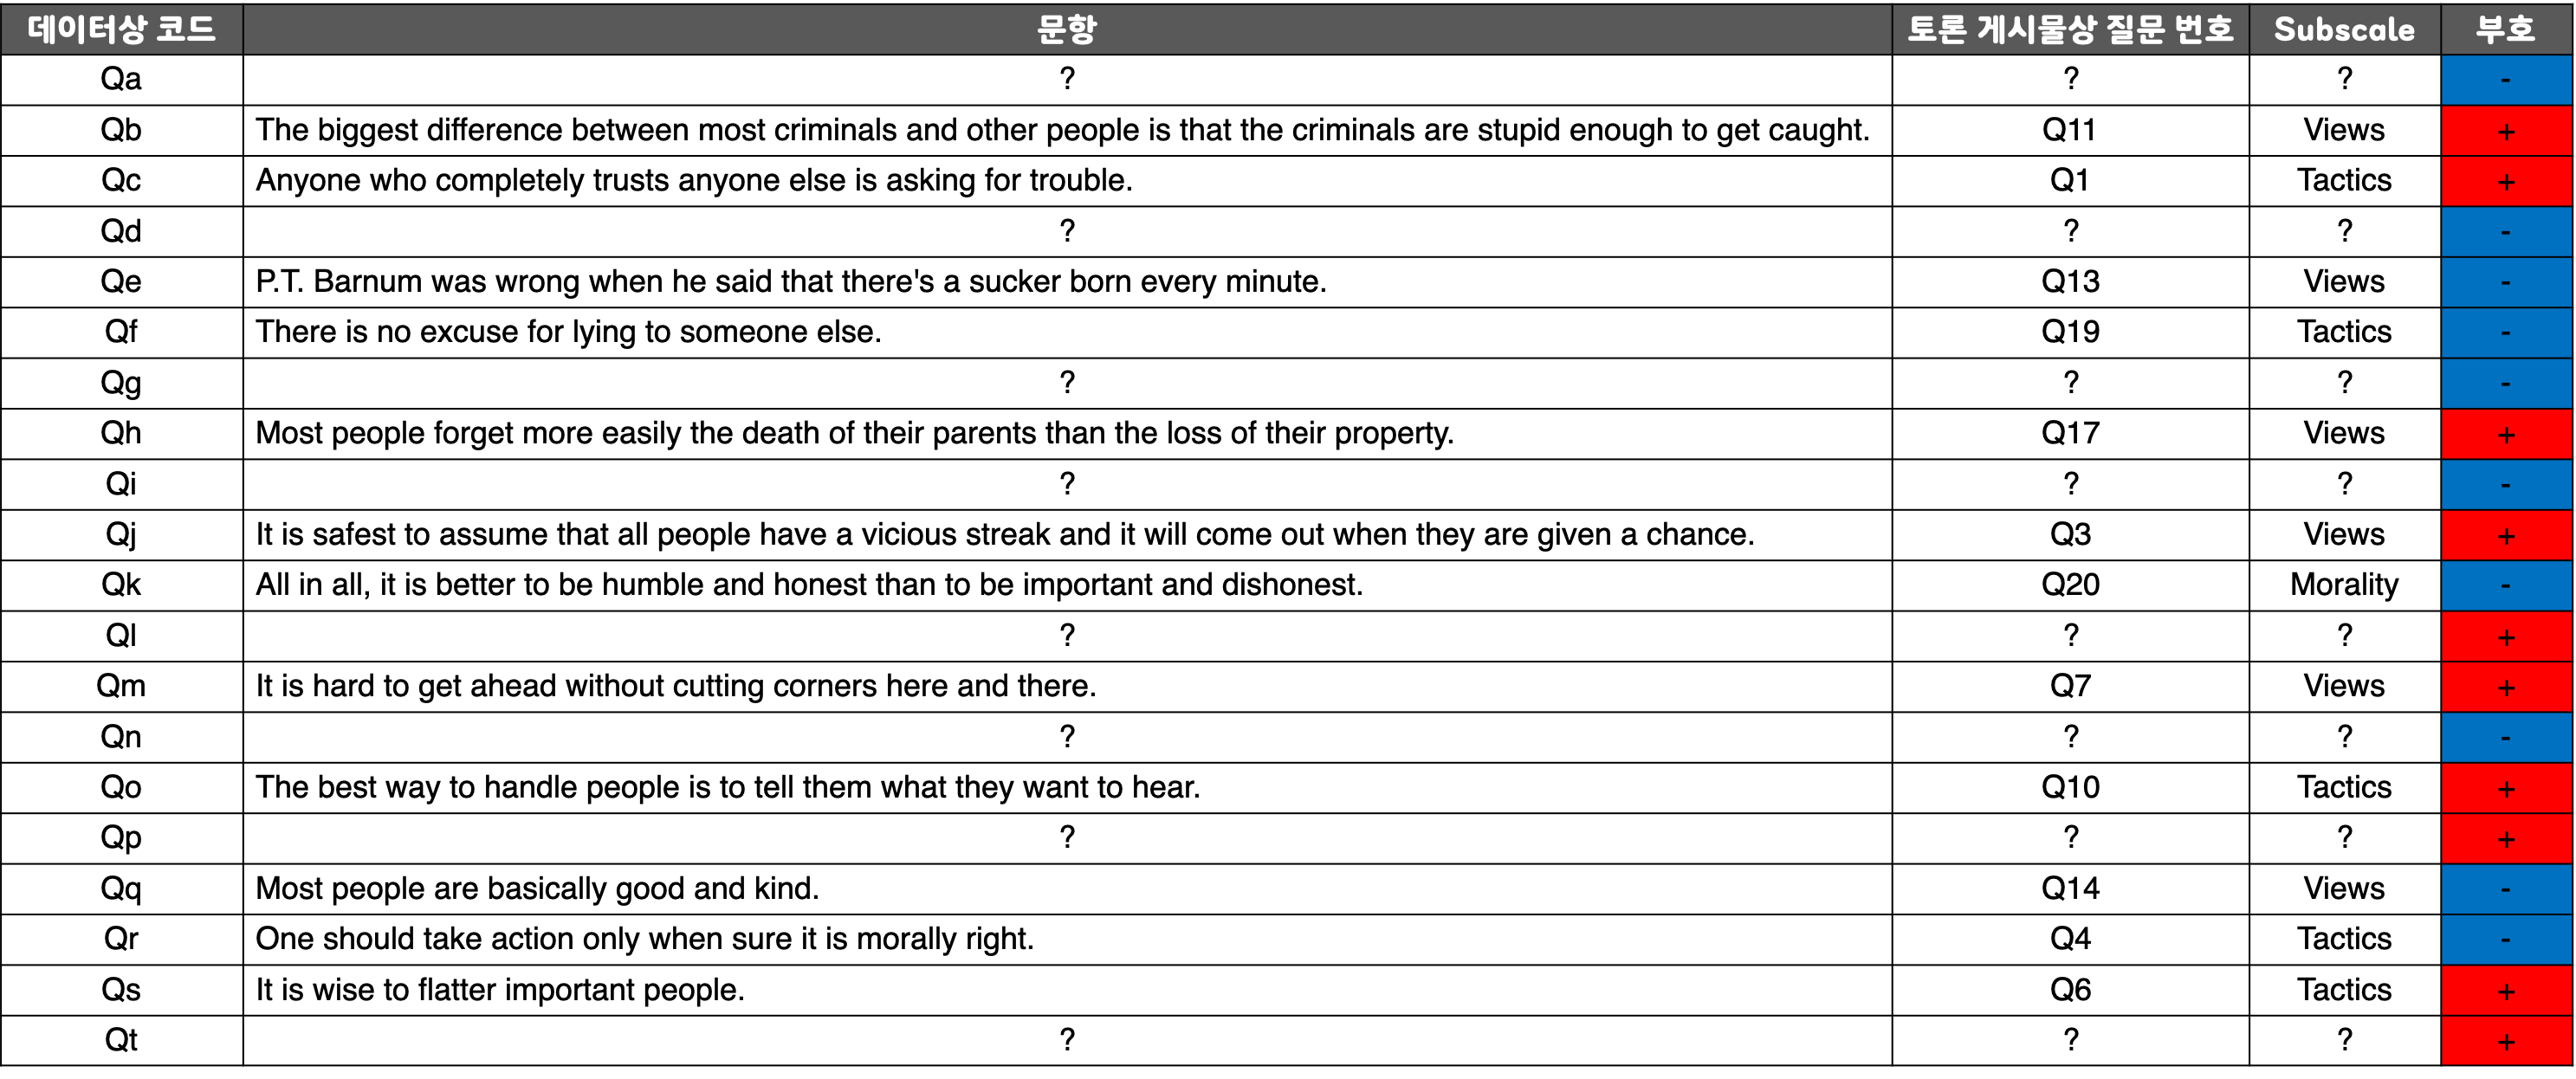

In [12]:
Image("img/Picture3.png")

이를 기반으로 마키아벨리니즘 테스트 스코어를 나타내는 Mach_score column을 추가해줍니다. 

In [11]:
data['Mach_score'] = data[Answers].mean(axis = 1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,...,1,0,1,1,0,1,0,1,1,2.95
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,...,1,0,1,1,0,1,0,1,1,2.60
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,...,1,0,1,1,1,1,0,1,1,1.90
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,...,0,0,0,1,0,1,0,1,1,3.35
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,...,1,1,1,1,0,1,1,1,1,3.00


Mach_score의 distribution을 살펴보면 다음과 같습니다. 

In [12]:
data[['Mach_score']].describe()

,Mach_score
count,45532.000000
mean,3.352474
std,0.794661
min,1.000000
25%,2.750000
50%,3.350000
75%,3.950000
max,5.000000


In [18]:
data.to_csv('train_machscore.csv',index=False)

In [17]:
sns.distplot(data, x="Mach_score", bins=100)

TypeError: distplot() got an unexpected keyword argument 'x'